In [40]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
#read data
df = pd.read_csv ('F:\\Data Science - rahul notes\Machine Learning algorithms\Advertising.csv')
print(df)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [42]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [43]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [44]:
df.drop(0)

,TV,radio,newspaper,sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [45]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [46]:
#training the model
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [47]:
#splitting the model into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)

In [48]:
#training the model
linear = LinearRegression()
#fitting model
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#calculating intercepts and coefficients
linear.intercept_

2.9079470208164295

In [50]:
coefficient = pd.DataFrame(linear.coef_, x.columns, columns = ['coefficients'])
print(coefficient)

           coefficients
TV             0.046843
radio          0.178544
newspaper      0.002586


In [51]:
#predicting the data
predict = linear.predict(x_test)
print(predict)

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


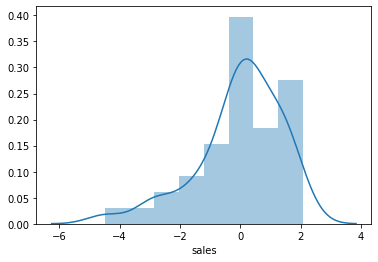

In [52]:
#plotting error or residual 
residual = y_test - predict
sns.distplot(residual)

In [53]:
#valuating model
#calculating mean_absolute_error, mean squared error, squared mean squared error
print('MAE: ', metrics.mean_absolute_error(y_test, predict))
print('MSE: ', metrics.mean_squared_error(y_test, predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE:  1.0402154012924711
MSE:  1.9918855518287877
RMSE:  1.4113417558581578
